# Health Insurance Cost Prediction
project goal:
The insurance company wants to develop a model which automatically predicts the health insurance cost for their customers.

In [3]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import the insurance data
insurance=pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


**We can see from the info that this is a dataset with 7 columns total, no missing values, all the variable types seem to be reasonable, charges is our target variable**

In [8]:
# look at numerical values statistics and look for outliers
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**From the describe table, we can see all the numerical values seem to be OK and no outliners**

In [11]:
#check to see if any invalid values for sex column
insurance["sex"].unique()

array(['female', 'male'], dtype=object)

In [12]:
#check to see if any invalid values for region column
insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
insurance["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [5]:
#since python can only take in numerical values for model, we need to convert gender, smoker,region these three variables into numericals
#convert gender by using a fuction, female=0,male=1
def convert_sex(x):
    converted=[]
    for i in x:
        if i=="female":
            converted.append(0)
        else:
            converted.append(1)
    return converted
insurance["sex_converted"]=convert_sex(insurance["sex"])
insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_converted
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [6]:
#convert smoker column using a fuction,no=0,yes=1
def convert_smoker(x):
    converted=[]
    for i in x:
        if i=="no":
            converted.append(0)
        if i=="yes":
            converted.append(1)
    return converted
insurance["convert_smoker"]=convert_smoker(insurance["smoker"])
insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_converted,convert_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [7]:
#encoding region column,note there is no order
insurance["region_copy"]=insurance["region"]
insurance = pd.get_dummies(insurance, columns=['region_copy'])

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_converted,convert_smoker,region_copy_northeast,region_copy_northwest,region_copy_southeast,region_copy_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0


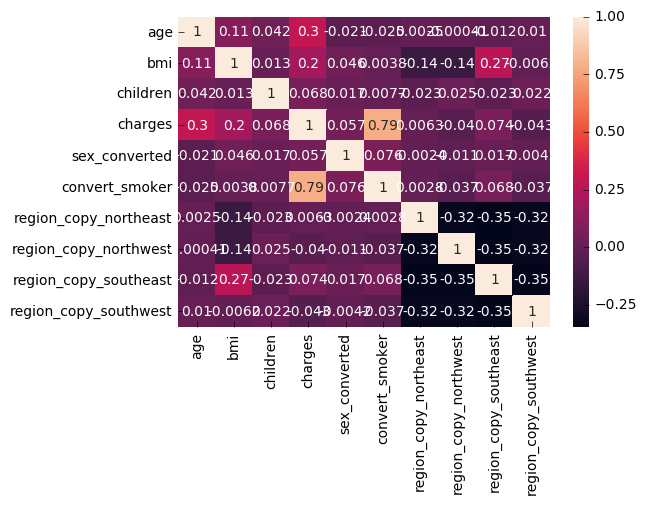

In [36]:
#EDA
sns.heatmap(insurance.corr(), annot=True)

** From the heatmap, it seems that whether a person is a smoker will cause the greatest charge difference, and it makes sense since smokers tend to be in poor health condition and insurance company will have to collect more money from them to take the risk!** 

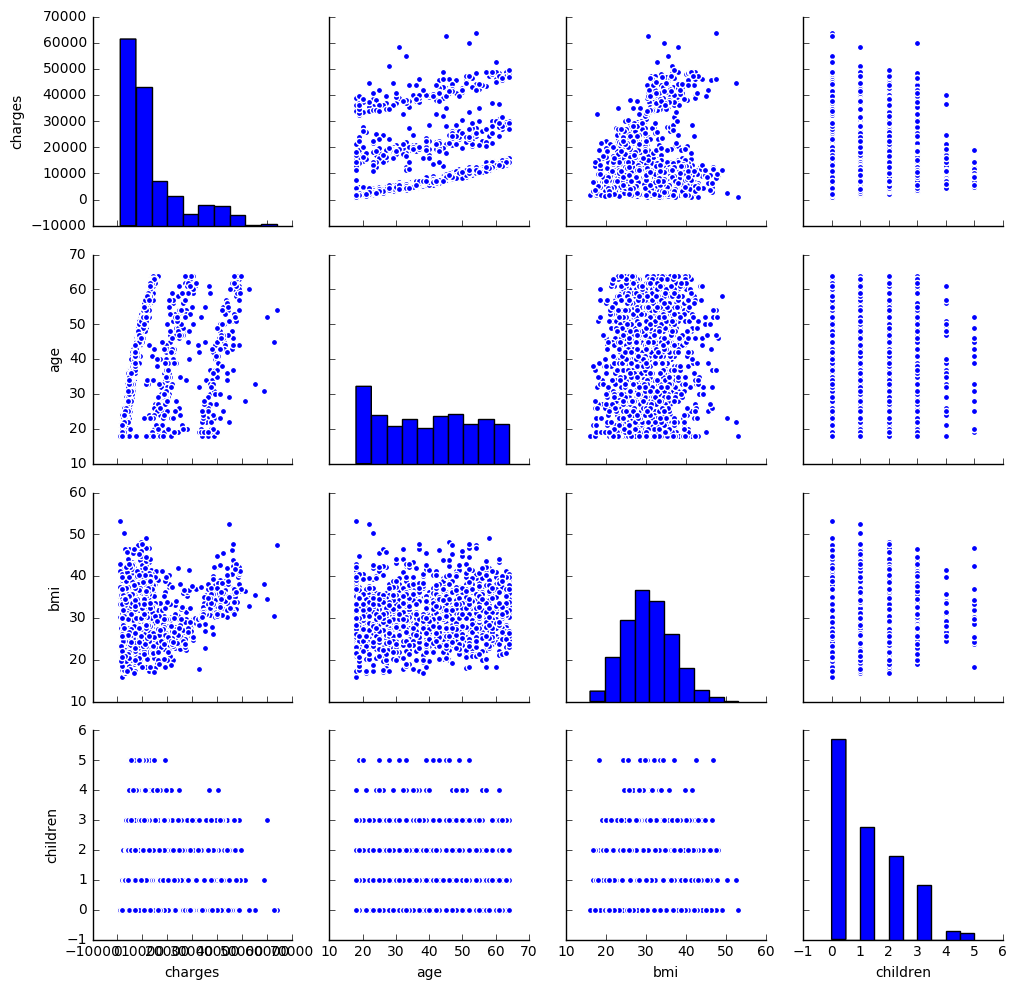

In [43]:
 sns.pairplot(insurance,vars=["charges","age","bmi","children"])

**we can get some idea about the distribution of the data, for example, the majority people have no kids, bmi is roughly normal distributed, age is evenly spread out from 20 to 65,the charge is a right skewed dist which makes sense, since majority people will come in with low premiums, while very few people have high risks to pay high premiums. **

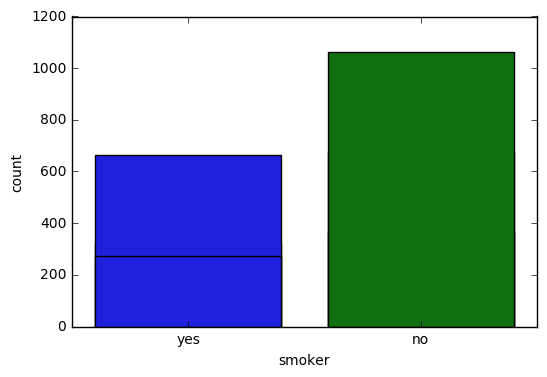

In [46]:
sns.countplot(x="smoker", data=insurance)

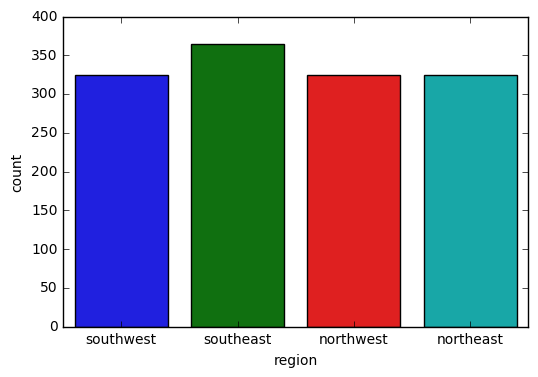

In [47]:
sns.countplot(x="region", data=insurance)

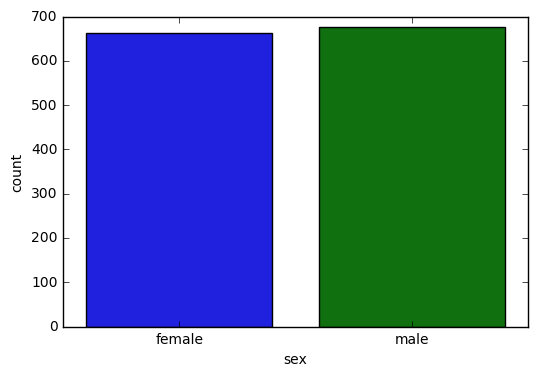

In [48]:
sns.countplot(x="sex", data=insurance)

**Seems like the insured customers are distributed evenly by sex and geo, but more nonsmokers are insured than smokers, the reason behind it is not because smokers do not want to pay for the premiums, but rather they are rejected by the insurance company because of the high risks associated with the smokers!**

In [9]:
#build our regression model since we do not have a lot of variables we can start by putting them all in our model to see performance, but as 
#we see it before already, most of them do not have strong correlation with charges column

X=insurance[["age","bmi","children","sex_converted","convert_smoker","region_copy_northeast","region_copy_northwest",
             "region_copy_southeast","region_copy_southwest"]]
y=insurance["charges"]

In [10]:
#train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [11]:
X_train.head()

,age,bmi,children,sex_converted,convert_smoker,region_copy_northeast,region_copy_northwest,region_copy_southeast,region_copy_southwest
1104,37,29.800,0,1,0,0.0,0.0,0.0,1.0
37,26,20.800,0,1,0,0.0,0.0,0.0,1.0
616,56,28.595,0,0,0,1.0,0.0,0.0,0.0
1044,55,35.245,1,1,0,1.0,0.0,0.0,0.0
495,20,27.930,0,1,0,1.0,0.0,0.0,0.0


In [12]:
#fit the linear regression
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print(lm.intercept_)
lm.coef_

-13451.5297234


array([   265.68387012,    354.42056968,    641.98184735,   -339.73822213,
        24445.95827586,    211.24206977,    666.58161694,   -675.67042476,
         -202.15326194])

In [ ]:
#print the predicted coefficient for each predictor
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

In [15]:
# Getting predictions from the model 
predictions = lm.predict(X_test)

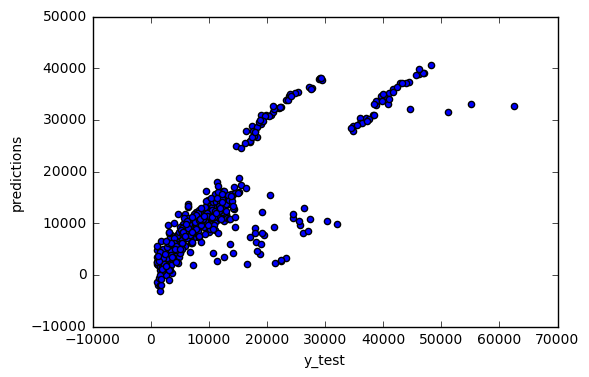

In [16]:
#creat a scatter plot for predictions vs actual testing data
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

C:\Users\Cyndi Wang\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


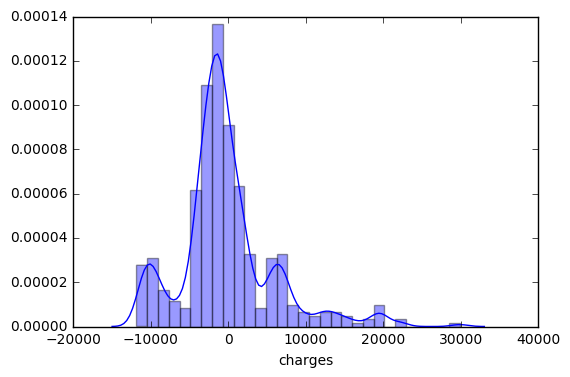

In [17]:
#Residual Histogram
sns.distplot(y_test-predictions,bins=30);

In [18]:
#Print MAE, MSE and RMSE
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4275.04662166
MSE: 37785488.511
RMSE: 6146.99019935


In [19]:
#now let's try  put smoker, children, bmi, age in the model
X=insurance[["convert_smoker","children","bmi","age"]]
y=insurance["charges"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
lm.coef_

-12960.8439033


array([ 24332.24661616,    641.22740784,    331.67470839,    266.69970214])

In [20]:
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
convert_smoker,24332.246616
children,641.227408
bmi,331.674708
age,266.699702


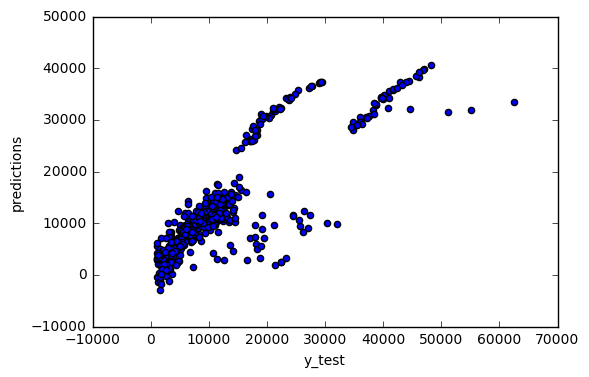

In [21]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [22]:
#measure the model performance
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4231.76644786
MSE: 37451521.7804
RMSE: 6119.76484682
